In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, os.path
plt.rcParams['figure.figsize'] = [10, 6]

Text(0.5, 1.0, 'Comparison of speeds on the lane-assist problem')

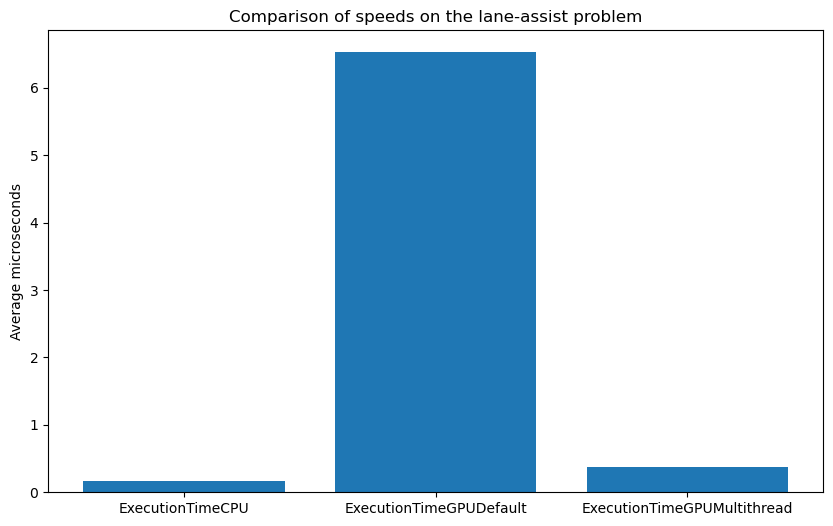

In [21]:
data = pd.read_csv("data.csv")

CPUData = data["ExecutionTimeCPU"]
GPUDataDefault = data["ExecutionTimeGPUDefault"]
GPUDataMultithread = data["ExecutionTimeGPUMultithread"]

fig, ax = plt.subplots()

headers = list(data.columns.values)
values = list(data.mean(axis=0) / 1e6)

ax.bar(headers, values)

ax.set_ylabel("Average microseconds")
ax.set_title("Comparison of speeds on the lane-assist problem")
